In [90]:
import pandas as pd
import json
import os
from collections import Counter
import numpy as np

In [2]:
data_dir = '/Users/s2531396/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Code'

### File 1

In [133]:
file = open('17264.json')

In [134]:
data = json.load(file)

In [135]:
type(data)

dict

In [136]:
df_generalDesc = pd.json_normalize(data['generalDesc'])
df_contributionDesc_authors = pd.json_normalize(data['contributionDesc']['authors'])
df_curators = pd.json_normalize(data['contributionDesc']['curators'])
df_institutions = pd.json_normalize(data['contributionDesc']['institutions'])
df_fundings = pd.json_normalize(data['contributionDesc']['fundings'])
df_experimentalDetails = pd.json_normalize(data['experimentalDetails'])
df_characteristics = pd.json_normalize(data['characteristic'])
df_bioDescrip = pd.json_normalize(data['bioDescription'])
df_summary = pd.json_normalize(data['bioSummary'])
df_provenance = pd.json_normalize(data['provenance'])

In [139]:
df_contributionDesc_authors

id login firstName lastName ORCID
0  None  None     Flash    Light  None

In [137]:
df_generalDesc

name                                            purpose description  \
0  CCA1:LUC  Analysis CCA1:LUC period and amplitude changes...        None   

  comments  
0     None

In [7]:
data['generalDesc']['name']

'Role of PRR7 in control of the CCA1 promoter'

In [8]:
df_generalDesc['name']

0    Role of PRR7 in control of the CCA1 promoter
Name: name, dtype: object

In [9]:
df_institutions = df_institutions.rename(columns={'name':'institution_name','longName':'logName'})

In [10]:
working_df = pd.concat([df_generalDesc, df_contributionDesc_authors, df_curators,
                       df_institutions, df_fundings, df_experimentalDetails, df_characteristics,
                       df_bioDescrip, df_summary, df_provenance], axis=1)

In [11]:
working_df['species'] = data['species']
working_df['dataCategory'] = data['dataCategory']
working_df['id_experiment'] = data['id']

In [12]:
working_df

name  \
0  Role of PRR7 in control of the CCA1 promoter   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   

                                         description  \
0  In previous experiments several clock mutation...   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   

  lastName ORCID       institution_name  ... materialTypes materialOrigins  \
0    Nimmo  None  University of Glasgow  ...            []              []   

  customTags externalIds                               created   createdBy  \
0         []          []  [2021, 5, 20, 11, 40, 29, 435610000]  Hugh Nimmo   

                              modified  modifiedBy   dataCategory  \
0  [2021, 9, 22, 10, 12, 6, 894984951]  Hugh Nimmo  EXPR_REPORTER   

  id_experiment  
0         19235  

[1 rows x 49 columns]

### Several files at time

In [13]:
file_list =["1153.json", "2842.json", "3492.json", "3638.json","3647.json", "3648.json", 
            "10010.json", "10040.json", "10060.json", "17264.json", "19235.json"]

In [14]:
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

if __name__ == "__main__":
    json_files = file_list

    file_contents = {}  

    for json_file in json_files:
        content = read_json_file(json_file)
        file_contents[json_file] = content


In [15]:
def json_to_data (ID, dicctionary):
    
    data = dicctionary[ID]
    
    df_generalDesc = pd.json_normalize(data['generalDesc'])
    df_contributionDesc_authors = pd.json_normalize(data['contributionDesc']['authors'])
    df_curators = pd.json_normalize(data['contributionDesc']['curators'])
    df_institutions = pd.json_normalize(data['contributionDesc']['institutions'])
    df_fundings = pd.json_normalize(data['contributionDesc']['fundings'])
    df_experimentalDetails = pd.json_normalize(data['experimentalDetails'])
    df_characteristics = pd.json_normalize(data['characteristic'])
    df_bioDescrip = pd.json_normalize(data['bioDescription'])
    df_summary = pd.json_normalize(data['bioSummary'])
    df_provenance = pd.json_normalize(data['provenance'])
    
    df_institutions = df_institutions.rename(columns={'name':'institution_name','longName':'logName'})
    
    working_df = pd.concat([df_generalDesc, df_contributionDesc_authors, df_curators,
                       df_institutions, df_fundings, df_experimentalDetails, df_characteristics,
                       df_bioDescrip, df_summary, df_provenance], axis=1)
    
    working_df['species'] = data['species']
    working_df['dataCategory'] = data['dataCategory']
    working_df['id_experiment'] = data['id']
    
    return working_df

In [16]:
test = json_to_data("19235.json", file_contents)

In [17]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   

                                         description  \
0  In previous experiments several clock mutation...   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   

  lastName ORCID       institution_name  ... materialTypes materialOrigins  \
0    Nimmo  None  University of Glasgow  ...            []              []   

  customTags externalIds                               created   createdBy  \
0         []          []  [2021, 5, 20, 11, 40, 29, 435610000]  Hugh Nimmo   

                              modified  modifiedBy   dataCategory  \
0  [2021, 9, 22, 10, 12, 6, 894984951]  Hugh Nimmo  EXPR_REPORTER   

  id_experiment  
0         19235  

[1 rows x 49 columns]

In [18]:
test2 = json_to_data("17264.json", file_contents)
test2

name                                            purpose description  \
0  CCA1:LUC  Analysis CCA1:LUC period and amplitude changes...        None   

  comments    id login firstName lastName ORCID         institution_name  ...  \
0     None  None  None     Flash    Light  None  University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   

                                created   createdBy  \
0  [2020, 9, 11, 20, 24, 51, 845822000]  Sergio Gil   

                             modified  modifiedBy   dataCategory  \
0  [2023, 2, 11, 1, 15, 14, 35289364]  Sergio Gil  EXPR_REPORTER   

   id_experiment  
0          17264  

[1 rows x 47 columns]

In [36]:
test3 = json_to_data("2842.json", file_contents)

In [37]:
row_dict = test3.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   
1                                               None  None    None     Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None    Tomasz   

    lastName ORCID                   institution_name  ... materialTypes  \
0      Nimmo  None              University of Glasgow  ...            []   
1      Light  None            University of Edinburgh  ...            []   
2  Zielinski  None  MPI of Molecular Plant Physiology  ...            []   

  materialOrigins customTags externalIds  \
0              []         []          []   
1              []         []          []   
2              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   

                               modified    modifiedBy   dataCategory  \
0   [2021, 9, 22, 10, 12, 6, 894984951]    Hugh Nimmo  EXPR_REPORTER   
1    [2023, 2, 11, 1, 15, 14, 35289364]    Sergio Gil  EXPR_REPORTER   
2  [2018, 2, 13, 19, 39, 31, 166000000]  BD1 BioDare1     TRANSCRIPT   

  id_experiment  
0         19235  
1         17264  
2          2842  

[3 rows x 49 columns]

In [39]:
test4 = json_to_data("3492.json", file_contents)

In [40]:
row_dict = test4.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   
1                                               None  None    None     Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None    Tomasz   
3  24h sample lost for several genotypes. \nCurat...  None    None    Aurora   

          lastName ORCID                   institution_name  ...  \
0            Nimmo  None              University of Glasgow  ...   
1            Light  None            University of Edinburgh  ...   
2        Zielinski  None  MPI of Molecular Plant Physiology  ...   
3  Pinas-Fernandez  None            University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   
1            []              []         []          []   
2            []              []         []          []   
3            []              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   

                               modified    modifiedBy   dataCategory  \
0   [2021, 9, 22, 10, 12, 6, 894984951]    Hugh Nimmo  EXPR_REPORTER   
1    [2023, 2, 11, 1, 15, 14, 35289364]    Sergio Gil  EXPR_REPORTER   
2  [2018, 2, 13, 19, 39, 31, 166000000]  BD1 BioDare1     TRANSCRIPT   
3  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   

  id_experiment  
0         19235  
1         17264  
2          2842  
3          3492  

[4 rows x 49 columns]

In [41]:
test5 = json_to_data("3492.json", file_contents)

In [42]:
row_dict = test5.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   
1                                               None  None    None     Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None    Tomasz   
3  24h sample lost for several genotypes. \nCurat...  None    None    Aurora   
4  24h sample lost for several genotypes. \nCurat...  None    None    Aurora   

          lastName ORCID                   institution_name  ...  \
0            Nimmo  None              University of Glasgow  ...   
1            Light  None            University of Edinburgh  ...   
2        Zielinski  None  MPI of Molecular Plant Physiology  ...   
3  Pinas-Fernandez  None            University of Edinburgh  ...   
4  Pinas-Fernandez  None            University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   
1            []              []         []          []   
2            []              []         []          []   
3            []              []         []          []   
4            []              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   

                               modified    modifiedBy   dataCategory  \
0   [2021, 9, 22, 10, 12, 6, 894984951]    Hugh Nimmo  EXPR_REPORTER   
1    [2023, 2, 11, 1, 15, 14, 35289364]    Sergio Gil  EXPR_REPORTER   
2  [2018, 2, 13, 19, 39, 31, 166000000]  BD1 BioDare1     TRANSCRIPT   
3  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   
4  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   

  id_experiment  
0         19235  
1         17264  
2          2842  
3          3492  
4          3492  

[5 rows x 49 columns]

In [43]:
test6 = json_to_data("3638.json", file_contents)

In [44]:
row_dict = test6.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   

                                            comments    id   login  firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo       Hugh   
1                                               None  None    None      Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None     Tomasz   
3  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
4  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
5  Data collection by Victoria Hibberd ca. Septem...  None    None  Andrew J.   

          lastName ORCID                   institution_name  ...  \
0            Nimmo  None              University of Glasgow  ...   
1            Light  None            University of Edinburgh  ...   
2        Zielinski  None  MPI of Molecular Plant Physiology  ...   
3  Pinas-Fernandez  None            University of Edinburgh  ...   
4  Pinas-Fernandez  None            University of Edinburgh  ...   
5           Millar  None            University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   
1            []              []         []          []   
2            []              []         []          []   
3            []              []         []          []   
4            []              []         []          []   
5            []              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
5             [2015, 10, 27, 20, 2, 45]     Andrew Millar   

                               modified    modifiedBy   dataCategory  \
0   [2021, 9, 22, 10, 12, 6, 894984951]    Hugh Nimmo  EXPR_REPORTER   
1    [2023, 2, 11, 1, 15, 14, 35289364]    Sergio Gil  EXPR_REPORTER   
2  [2018, 2, 13, 19, 39, 31, 166000000]  BD1 BioDare1     TRANSCRIPT   
3  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   
4  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   
5  [2018, 2, 13, 19, 38, 52, 124000000]  BD1 BioDare1  EXPR_REPORTER   

  id_experiment  
0         19235  
1         17264  
2          2842  
3          3492  
4          3492  
5          3638  

[6 rows x 49 columns]

In [45]:
test7 = json_to_data("3647.json", file_contents)

In [46]:
row_dict = test7.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   

                                            comments    id   login  firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo       Hugh   
1                                               None  None    None      Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None     Tomasz   
3  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
4  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
5  Data collection by Victoria Hibberd ca. Septem...  None    None  Andrew J.   
6  Data collection by Victoria Hibberd ca. Septem...  None    None     Andrew   

          lastName ORCID                               institution_name  ...  \
0            Nimmo  None                          University of Glasgow  ...   
1            Light  None                        University of Edinburgh  ...   
2        Zielinski  None              MPI of Molecular Plant Physiology  ...   
3  Pinas-Fernandez  None                        University of Edinburgh  ...   
4  Pinas-Fernandez  None                        University of Edinburgh  ...   
5           Millar  None                        University of Edinburgh  ...   
6           Millar  None  University of Warwick University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   
1            []              []         []          []   
2            []              []         []          []   
3            []              []         []          []   
4            []              []         []          []   
5            []              []         []          []   
6            []              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
5             [2015, 10, 27, 20, 2, 45]     Andrew Millar   
6              [2015, 10, 29, 0, 0, 32]     Andrew Millar   

                               modified    modifiedBy   dataCategory  \
0   [2021, 9, 22, 10, 12, 6, 894984951]    Hugh Nimmo  EXPR_REPORTER   
1    [2023, 2, 11, 1, 15, 14, 35289364]    Sergio Gil  EXPR_REPORTER   
2  [2018, 2, 13, 19, 39, 31, 166000000]  BD1 BioDare1     TRANSCRIPT   
3  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   
4  [2018, 2, 13, 19, 39, 31, 736000000]  BD1 BioDare1     TRANSCRIPT   
5  [2018, 2, 13, 19, 38, 52, 124000000]  BD1 BioDare1  EXPR_

In [50]:
test8 = json_to_data("3648.json", file_contents)

In [48]:
row_dict = test8.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   

                                            comments    id   login  firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo       Hugh   
1                                               None  None    None      Flash   
2  The elf3 mutant was harvested at 13 day not at...  None    None     Tomasz   
3  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
4  24h sample lost for several genotypes. \nCurat...  None    None     Aurora   
5  Data collection by Victoria Hibberd ca. Septem...  None    None  Andrew J.   
6  Data collection by Victoria Hibberd ca. Septem...  None    None     Andrew   
7  Data collection by Victoria Hibberd ca. Septem...  None    None     Andrew   

          lastName ORCID                               institution_name  ...  \
0            Nimmo  None                          University of Glasgow  ...   
1            Light  None                        University of Edinburgh  ...   
2        Zielinski  None              MPI of Molecular Plant Physiology  ...   
3  Pinas-Fernandez  None                        University of Edinburgh  ...   
4  Pinas-Fernandez  None                        University of Edinburgh  ...   
5           Millar  None                        University of Edinburgh  ...   
6           Millar  None  University of Warwick University of Edinburgh  ...   
7           Millar  None                        University of Edinburgh  ...   

  materialTypes materialOrigins customTags externalIds  \
0            []              []         []          []   
1            []              []         []          []   
2            []              []         []          []   
3            []              []         []          []   
4            []              []         []          []   
5            []              []         []          []   
6            []              []         []          []   
7            []              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
5             [2015, 10, 27, 20, 2, 45]     Andrew Millar   
6              [2015, 10, 29, 0, 0, 32]     Andrew Millar   
7              [2015, 10, 29, 0, 2, 31]     Andrew Millar   

                               modified    modifi

In [51]:
test9 = json_to_data("10060.json", file_contents)

In [52]:
row_dict = test9.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   

                                            comments    id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627   hnimmo   
1                                               None  None     None   
2  The elf3 mutant was harvested at 13 day not at...  None     None   
3  24h sample lost for several genotypes. \nCurat...  None     None   
4  24h sample lost for several genotypes. \nCurat...  None     None   
5  Data collection by Victoria Hibberd ca. Septem...  None     None   
6  Data collection by Victoria Hibberd ca. Septem...  None     None   
7  Data collection by Victoria Hibberd ca. Septem...  None     None   
8                                               None  1022  buchler   

   firstName         lastName ORCID  \
0       Hugh            Nimmo  None   
1      Flash            Light  None   
2     Tomasz        Zielinski  None   
3     Aurora  Pinas-Fernandez  None   
4     Aurora  Pinas-Fernandez  None   
5  Andrew J.           Millar  None   
6     Andrew           Millar  None   
7     Andrew           Millar  None   
8    Nicolas          Buchler  None   

                                institution_name  ... materialTypes  \
0                          University of Glasgow  ...            []   
1                        University of Edinburgh  ...            []   
2              MPI of Molecular Plant Physiology  ...            []   
3                        University of Edinburgh  ...            []   
4                        University of Edinburgh  ...            []   
5                        University of Edinburgh  ...            []   
6  University of Warwick University of Edinburgh  ...            []   
7                        University of Edinburgh  ...            []   
8                                Duke University  ...            []   

  materialOrigins customTags externalIds  \
0              []         []          []   
1              []         []          []   
2              []         []          []   
3              []         []          []   
4              []         []          []   
5              []         []          []   
6              []         []          []   
7              []         []          []   
8              []         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 84582

In [53]:
test10 = json_to_data("3647.json", file_contents)

In [117]:
row_dict = test10.iloc[0].to_dict()
test.loc[len(test)] = row_dict
test

name  \
0   Role of PRR7 in control of the CCA1 promoter   
1                                       CCA1:LUC   
2                    TiMet WP1.1 qRT-PCR elf3 LD   
3                       Q-PCR LD (12:12) 17C LHY   
4                       Q-PCR LD (12:12) 17C LHY   
5                   cca1 lhy Long #1 CCA1 marker   
6                   cca1 lhy Long #1 CAB2 marker   
7                   cca1 lhy Long #1 CCR2 marker   
8                                      test test   
9                   cca1 lhy Long #1 CAB2 marker   
10                  cca1 lhy Long #1 CAB2 marker   

                                              purpose  \
0   To test whether PRR7 is required for circadian...   
1   Analysis CCA1:LUC period and amplitude changes...   
2   TiMet focuses on an important and general biol...   
3   Experiment to reparameterize the clock model w...   
4   Experiment to reparameterize the clock model w...   
5   Test for period changes during seedlling growt...   
6   Test for period changes during seedlling growt...   
7   Test for period changes during seedlling growt...   
8   test test test test test test test test test t...   
9   Test for period changes during seedlling growt...   
10  Test for period changes during seedlling growt...   

                                          description  \
0   In previous experiments several clock mutation...   
1                                                       
2   WT and elf3-4 mutants, in biological duplicate...   
3   Literature data from: 'Temp'\n\t    by: Aurora...   
4   Literature data from: 'Temp'\n\t    by: Aurora...   
5   If periods change during development, then our...   
6   If periods change during development, then our...   
7   If periods change during development, then our...   
8                                                test   
9   If periods change during development, then our...   
10  If periods change during development, then our...   

                                             comments      id    login  \
0   Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                        
2   The elf3 mutant was harvested at 13 day not at...                    
3   24h sample lost for several genotypes. \nCurat...                    
4   24h sample lost for several genotypes. \nCurat...                    
5   Data collection by Victoria Hibberd ca. Septem...                    
6   Data collection by Victoria Hibberd ca. Septem...                    
7   Data collection by Victoria Hibberd ca. Septem...                    
8                                                      1022.0  buchler   
9   Data collection by Victoria Hibberd ca. Septem...                    
10  Data collection by Victoria Hibberd ca. Septem...    None     None   

    firstName         lastName ORCID  \
0        Hugh            Nimmo         
1       Flash            Light         
2      Tomasz        Zielinski         
3      Aurora  Pinas-Fernandez         
4      Aurora  Pinas-Fernandez         
5   Andrew J.           Millar         
6      Andrew           Millar         
7      Andrew           Millar         
8     Nicolas          Buchler         
9      Andrew           Millar         
10     Andrew           Millar  None   

                                 institution_name  ...          dataCategory  \
0                           University of Glasgow  ...         EXPR_REPORTER   
1                         University of Edinburgh  ...         EXPR_REPORTER   
2               MPI of Molecular Plant Physiology  ...            TRANSCRIPT   
3                         University of Edinburgh  ...            TRANSCRIPT   
4                         University of Edinburgh  ...            TRANSCRIPT   
5                         University of Edinburgh  ...         EXPR_REPORTER   
6   University of Warwick University of Edinburgh  ...         EXPR_REPORTER   
7                         University of

### One dataframe

In [19]:
row_dict = test2.iloc[0].to_dict()

In [20]:
test.loc[len(test)] = row_dict

In [21]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   

                                            comments    id   login firstName  \
0  Details are as in Bordage et al (2016) New Phy...  2627  hnimmo      Hugh   
1                                               None  None    None     Flash   

  lastName ORCID         institution_name  ... materialTypes materialOrigins  \
0    Nimmo  None    University of Glasgow  ...            []              []   
1    Light  None  University of Edinburgh  ...            []              []   

  customTags externalIds                               created   createdBy  \
0         []          []  [2021, 5, 20, 11, 40, 29, 435610000]  Hugh Nimmo   
1         []          []  [2020, 9, 11, 20, 24, 51, 845822000]  Sergio Gil   

                              modified  modifiedBy   dataCategory  \
0  [2021, 9, 22, 10, 12, 6, 894984951]  Hugh Nimmo  EXPR_REPORTER   
1   [2023, 2, 11, 1, 15, 14, 35289364]  Sergio Gil  EXPR_REPORTER   

  id_experiment  
0         19235  
1         17264  

[2 rows x 49 columns]

In [22]:
lista = []
for value in test["name"]:
    phrase = value.split()
    words_count = len(phrase)
    lista.append(words_count)
    print(lista)

[9]
[9, 1]


### Functions for the analysis

In [23]:
def count_words(phrase):
    words = phrase.split()
    return len(words)

In [24]:
def character_long (new_list, row_header, number_of_elements,df):
    for value in number_of_elements:
        valor = len(df[row_header][value])
        new_list.append(valor)
    return new_list

In [86]:
def number_of_words (row_header, number_of_elements, df,lista):
    for value in number_of_elements:
        phrase = df[row_header][value]
        words_test = count_words(phrase)
        lista.append(words_test)
    return lista

In [26]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

### Analysis

In [55]:
new_list = []
row_header = "name"
number_of_entries = {0,1,2,3,4,5,6,7,8,9}

In [56]:
name_number_words = number_of_words(row_header,number_of_entries,test, new_list)
name_number_words

[9, 1, 5, 5, 5, 6, 6, 6, 2, 6]

In [57]:
new_list_1 = []
charac_on_name = character_long(new_list_1, row_header, number_of_entries, test)
charac_on_name 

[44, 8, 27, 24, 24, 28, 28, 28, 9, 28]

In [58]:
test["number_of_words_name"] = name_number_words
test["charac_on_name"]= charac_on_name

In [59]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments    id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627   hnimmo   
1                                               None  None     None   
2  The elf3 mutant was harvested at 13 day not at...  None     None   
3  24h sample lost for several genotypes. \nCurat...  None     None   
4  24h sample lost for several genotypes. \nCurat...  None     None   
5  Data collection by Victoria Hibberd ca. Septem...  None     None   
6  Data collection by Victoria Hibberd ca. Septem...  None     None   
7  Data collection by Victoria Hibberd ca. Septem...  None     None   
8                                               None  1022  buchler   
9  Data collection by Victoria Hibberd ca. Septem...  None     None   

   firstName         lastName ORCID  \
0       Hugh            Nimmo  None   
1      Flash            Light  None   
2     Tomasz        Zielinski  None   
3     Aurora  Pinas-Fernandez  None   
4     Aurora  Pinas-Fernandez  None   
5  Andrew J.           Millar  None   
6     Andrew           Millar  None   
7     Andrew           Millar  None   
8    Nicolas          Buchler  None   
9     Andrew           Millar  None   

                                institution_name  ... customTags externalIds  \
0                          University of Glasgow  ...         []          []   
1                        University of Edinburgh  ...         []          []   
2              MPI of Molecular Plant Physiology  ...         []          []   
3                        University of Edinburgh  ...         []          []   
4                        University of Edinburgh  ...         []          []   
5                        University of Edinburgh  ...         []          []   
6  University of Warwick University of Edinburgh  ...         []          []   
7                        University of Edinburgh  ...         []          []   
8                                Duke University  ...         []          []   
9  University of Warwick University of Edinburgh  ...         []          []   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845

In [60]:
missing_values_table(test)

Missing Values  % of Total Values
name                                                0                0.0
purpose                                             0                0.0
description                                         1               10.0
comments                                            2               20.0
id                                                  8               80.0
login                                               8               80.0
firstName                                           0                0.0
lastName                                            0                0.0
ORCID                                              10              100.0
institution_name                                    0                0.0
logName                                             0                0.0
grantNr                                             9               90.0
institution.name                                    9               90.0
executionDate                                       0                0.0
measurementDesc.technique                           1               10.0
measurementDesc.equipment                           2               20.0
measurementDesc.description                         2               20.0
measurementDesc.parameters                          0                0.0
growthEnvironments.environments                     0                0.0
experimentalEnvironments.environments               0                0.0
hasAttachments                                      1               10.0
hasTSData                                           0                0.0
hasPPAJobs                                          0                0.0
hasDataFiles                                        0                0.0
attachmentsSize                                     1               10.0
biodare1Id                                          1               10.0
isOpenAccess                                        1               10.0
licence                                             1               10.0
hasRhythmicityJobs                                  8               80.0
bios                                                0                0.0
dataCategories                                      0                0.0
labels                                              0                0.0
species                                             0                0.0
ecotypes                                            0                0.0
genotypes                                           0                0.0
markers                                             0                0.0
lines                                               0                0.0
growthStages                                        0                0.0
tagTypes                                            0                0.0
materialTypes                                       0                0.0
materialOrigins                                     0                0.0
customTags                                          0                0.0
externalIds                                         0                0.0
created                                             0                0.0
createdBy                                           0                0.0
modified                                            0                0.0
modifiedBy                                          0                0.0
dataCategory                                        0                0.0
id_experiment                                       0                0.0
number_of_words_name                                0                0.0
charac_on_name                                      0                0.0

### Purpose count

In [63]:
new_list_3 = []
row_header = "purpose"
purpose_number_words = number_of_words(row_header,number_of_entries,test, new_list_3)
purpose_number_words

[17, 7, 23, 9, 9, 17, 17, 17, 15, 17]

In [64]:
new_list_4 = []
row_header = "purpose"
purpose_on_name = character_long(new_list_4, row_header, number_of_entries, test)
purpose_on_name 

[93, 57, 160, 70, 70, 97, 97, 97, 74, 97]

In [65]:
test["number_of_words_purpose"] = purpose_number_words
test["charac_on_purpose"]= purpose_on_name

In [73]:
test["purpose"]

0    To test whether PRR7 is required for circadian...
1    Analysis CCA1:LUC period and amplitude changes...
2    TiMet focuses on an important and general biol...
3    Experiment to reparameterize the clock model w...
4    Experiment to reparameterize the clock model w...
5    Test for period changes during seedlling growt...
6    Test for period changes during seedlling growt...
7    Test for period changes during seedlling growt...
8    test test test test test test test test test t...
9    Test for period changes during seedlling growt...
Name: purpose, dtype: object

### Description count

In [76]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                               None   
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments    id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627   hnimmo   
1                                               None  None     None   
2  The elf3 mutant was harvested at 13 day not at...  None     None   
3  24h sample lost for several genotypes. \nCurat...  None     None   
4  24h sample lost for several genotypes. \nCurat...  None     None   
5  Data collection by Victoria Hibberd ca. Septem...  None     None   
6  Data collection by Victoria Hibberd ca. Septem...  None     None   
7  Data collection by Victoria Hibberd ca. Septem...  None     None   
8                                               None  1022  buchler   
9  Data collection by Victoria Hibberd ca. Septem...  None     None   

   firstName         lastName ORCID  \
0       Hugh            Nimmo  None   
1      Flash            Light  None   
2     Tomasz        Zielinski  None   
3     Aurora  Pinas-Fernandez  None   
4     Aurora  Pinas-Fernandez  None   
5  Andrew J.           Millar  None   
6     Andrew           Millar  None   
7     Andrew           Millar  None   
8    Nicolas          Buchler  None   
9     Andrew           Millar  None   

                                institution_name  ...  \
0                          University of Glasgow  ...   
1                        University of Edinburgh  ...   
2              MPI of Molecular Plant Physiology  ...   
3                        University of Edinburgh  ...   
4                        University of Edinburgh  ...   
5                        University of Edinburgh  ...   
6  University of Warwick University of Edinburgh  ...   
7                        University of Edinburgh  ...   
8                                Duke University  ...   
9  University of Warwick University of Edinburgh  ...   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
5             [2015, 10, 27, 20, 2, 45]  

In [88]:
test1 = test

In [138]:
test1.replace(to_replace=[None], value="", inplace=True)
#test1.fillna("",inplace=True)
test1

name  \
0   Role of PRR7 in control of the CCA1 promoter   
1                                       CCA1:LUC   
2                    TiMet WP1.1 qRT-PCR elf3 LD   
3                       Q-PCR LD (12:12) 17C LHY   
4                       Q-PCR LD (12:12) 17C LHY   
5                   cca1 lhy Long #1 CCA1 marker   
6                   cca1 lhy Long #1 CAB2 marker   
7                   cca1 lhy Long #1 CCR2 marker   
8                                      test test   
9                   cca1 lhy Long #1 CAB2 marker   
10                  cca1 lhy Long #1 CAB2 marker   

                                              purpose  \
0   To test whether PRR7 is required for circadian...   
1   Analysis CCA1:LUC period and amplitude changes...   
2   TiMet focuses on an important and general biol...   
3   Experiment to reparameterize the clock model w...   
4   Experiment to reparameterize the clock model w...   
5   Test for period changes during seedlling growt...   
6   Test for period changes during seedlling growt...   
7   Test for period changes during seedlling growt...   
8   test test test test test test test test test t...   
9   Test for period changes during seedlling growt...   
10  Test for period changes during seedlling growt...   

                                          description  \
0   In previous experiments several clock mutation...   
1                                                       
2   WT and elf3-4 mutants, in biological duplicate...   
3   Literature data from: 'Temp'\n\t    by: Aurora...   
4   Literature data from: 'Temp'\n\t    by: Aurora...   
5   If periods change during development, then our...   
6   If periods change during development, then our...   
7   If periods change during development, then our...   
8                                                test   
9   If periods change during development, then our...   
10  If periods change during development, then our...   

                                             comments      id    login  \
0   Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                        
2   The elf3 mutant was harvested at 13 day not at...                    
3   24h sample lost for several genotypes. \nCurat...                    
4   24h sample lost for several genotypes. \nCurat...                    
5   Data collection by Victoria Hibberd ca. Septem...                    
6   Data collection by Victoria Hibberd ca. Septem...                    
7   Data collection by Victoria Hibberd ca. Septem...                    
8                                                      1022.0  buchler   
9   Data collection by Victoria Hibberd ca. Septem...                    
10  Data collection by Victoria Hibberd ca. Septem...                    

    firstName         lastName ORCID  \
0        Hugh            Nimmo         
1       Flash            Light         
2      Tomasz        Zielinski         
3      Aurora  Pinas-Fernandez         
4      Aurora  Pinas-Fernandez         
5   Andrew J.           Millar         
6      Andrew           Millar         
7      Andrew           Millar         
8     Nicolas          Buchler         
9      Andrew           Millar         
10     Andrew           Millar         

                                 institution_name  ...          dataCategory  \
0                           University of Glasgow  ...         EXPR_REPORTER   
1                         University of Edinburgh  ...         EXPR_REPORTER   
2               MPI of Molecular Plant Physiology  ...            TRANSCRIPT   
3                         University of Edinburgh  ...            TRANSCRIPT   
4                         University of Edinburgh  ...            TRANSCRIPT   
5                         University of Edinburgh  ...         EXPR_REPORTER   
6   University of Warwick University of Edinburgh  ...         EXPR_REPORTER   
7                         University of

In [96]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                                      
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments      id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                       
2  The elf3 mutant was harvested at 13 day not at...                    
3  24h sample lost for several genotypes. \nCurat...                    
4  24h sample lost for several genotypes. \nCurat...                    
5  Data collection by Victoria Hibberd ca. Septem...                    
6  Data collection by Victoria Hibberd ca. Septem...                    
7  Data collection by Victoria Hibberd ca. Septem...                    
8                                                     1022.0  buchler   
9  Data collection by Victoria Hibberd ca. Septem...                    

   firstName         lastName ORCID  \
0       Hugh            Nimmo         
1      Flash            Light         
2     Tomasz        Zielinski         
3     Aurora  Pinas-Fernandez         
4     Aurora  Pinas-Fernandez         
5  Andrew J.           Millar         
6     Andrew           Millar         
7     Andrew           Millar         
8    Nicolas          Buchler         
9     Andrew           Millar         

                                institution_name  ...  \
0                          University of Glasgow  ...   
1                        University of Edinburgh  ...   
2              MPI of Molecular Plant Physiology  ...   
3                        University of Edinburgh  ...   
4                        University of Edinburgh  ...   
5                        University of Edinburgh  ...   
6  University of Warwick University of Edinburgh  ...   
7                        University of Edinburgh  ...   
8                                Duke University  ...   
9  University of Warwick University of Edinburgh  ...   

                                created         createdBy  \
0  [2021, 5, 20, 11, 40, 29, 435610000]        Hugh Nimmo   
1  [2020, 9, 11, 20, 24, 51, 845822000]        Sergio Gil   
2             [2015, 2, 22, 18, 47, 37]  Tomasz Zielinski   
3                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
4                [2015, 9, 4, 1, 21, 5]     Andrew Millar   
5             [2015

In [95]:
new_list_8 = []
row_header = "description"
description_number_words = number_of_words(row_header,number_of_entries,test,new_list_8)
description_number_words

[55, 0, 28, 43, 43, 73, 73, 80, 1, 73]

In [80]:
type(test["purpose"][0])

str

In [97]:
new_list_9 = []
row_header = "description"
description_on_name = character_long(new_list_9, row_header, number_of_entries, test)
description_on_name 

[339, 0, 176, 275, 275, 475, 475, 519, 4, 475]

In [98]:
test["number_of_words_description"] = description_number_words
test["chrac_on_description"]= description_on_name
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                                      
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments      id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                       
2  The elf3 mutant was harvested at 13 day not at...                    
3  24h sample lost for several genotypes. \nCurat...                    
4  24h sample lost for several genotypes. \nCurat...                    
5  Data collection by Victoria Hibberd ca. Septem...                    
6  Data collection by Victoria Hibberd ca. Septem...                    
7  Data collection by Victoria Hibberd ca. Septem...                    
8                                                     1022.0  buchler   
9  Data collection by Victoria Hibberd ca. Septem...                    

   firstName         lastName ORCID  \
0       Hugh            Nimmo         
1      Flash            Light         
2     Tomasz        Zielinski         
3     Aurora  Pinas-Fernandez         
4     Aurora  Pinas-Fernandez         
5  Andrew J.           Millar         
6     Andrew           Millar         
7     Andrew           Millar         
8    Nicolas          Buchler         
9     Andrew           Millar         

                                institution_name  ...  \
0                          University of Glasgow  ...   
1                        University of Edinburgh  ...   
2              MPI of Molecular Plant Physiology  ...   
3                        University of Edinburgh  ...   
4                        University of Edinburgh  ...   
5                        University of Edinburgh  ...   
6  University of Warwick University of Edinburgh  ...   
7                        University of Edinburgh  ...   
8                                Duke University  ...   
9  University of Warwick University of Edinburgh  ...   

                               modified       modifiedBy  \
0   [2021, 9, 22, 10, 12, 6, 894984951]       Hugh Nimmo   
1    [2023, 2, 11, 1, 15, 14, 35289364]       Sergio Gil   
2  [2018, 2, 13, 19, 39, 31, 166000000]     BD1 BioDare1   
3  [2018, 2, 13, 19, 39, 31, 736000000]     BD1 BioDare1   
4  [2018, 2, 13, 19, 39, 31, 736000000]     BD1 BioDare1   
5  [2018, 2, 13, 19, 38, 

In [131]:
test[['hasPPAJobs','hasDataFiles','id_experiment']]

hasPPAJobs  hasDataFiles id_experiment
0         True          True         19235
1         True          True         17264
2        False         False          2842
3        False         False          3492
4        False         False          3492
5         True         False          3638
6         True         False          3647
7         True         False          3648
8         True          True         10060
9         True         False          3647
10        True         False          3647

### Comments count

In [99]:
new_list_12 = []
row_header = "comments"
comments_number_words = number_of_words(row_header,number_of_entries,test,new_list_12)
comments_number_words

[12, 0, 53, 75, 75, 37, 37, 54, 0, 37]

In [100]:
new_list_11 = []
row_header = "comments"
comments_on_name = character_long(new_list_11, row_header, number_of_entries, test)
comments_on_name 

[63, 0, 331, 483, 483, 249, 249, 337, 0, 249]

In [101]:
test["number_of_words_comments"] = comments_number_words
test["chrac_on_comments"]= comments_on_name
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                                      
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments      id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                       
2  The elf3 mutant was harvested at 13 day not at...                    
3  24h sample lost for several genotypes. \nCurat...                    
4  24h sample lost for several genotypes. \nCurat...                    
5  Data collection by Victoria Hibberd ca. Septem...                    
6  Data collection by Victoria Hibberd ca. Septem...                    
7  Data collection by Victoria Hibberd ca. Septem...                    
8                                                     1022.0  buchler   
9  Data collection by Victoria Hibberd ca. Septem...                    

   firstName         lastName ORCID  \
0       Hugh            Nimmo         
1      Flash            Light         
2     Tomasz        Zielinski         
3     Aurora  Pinas-Fernandez         
4     Aurora  Pinas-Fernandez         
5  Andrew J.           Millar         
6     Andrew           Millar         
7     Andrew           Millar         
8    Nicolas          Buchler         
9     Andrew           Millar         

                                institution_name  ...          dataCategory  \
0                          University of Glasgow  ...         EXPR_REPORTER   
1                        University of Edinburgh  ...         EXPR_REPORTER   
2              MPI of Molecular Plant Physiology  ...            TRANSCRIPT   
3                        University of Edinburgh  ...            TRANSCRIPT   
4                        University of Edinburgh  ...            TRANSCRIPT   
5                        University of Edinburgh  ...         EXPR_REPORTER   
6  University of Warwick University of Edinburgh  ...         EXPR_REPORTER   
7                        University of Edinburgh  ...         EXPR_REPORTER   
8                                Duke University  ...  DELAYED_FLUORESCENCE   
9  University of Warwick University of Edinburgh  ...         EXPR_REPORTER   

  id_experiment number_of_words_name charac_on_name number_of_words_purpose  \
0         19235                    9             44             

### Heatmap

In [102]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, ' Scatter plot from Dataframe')

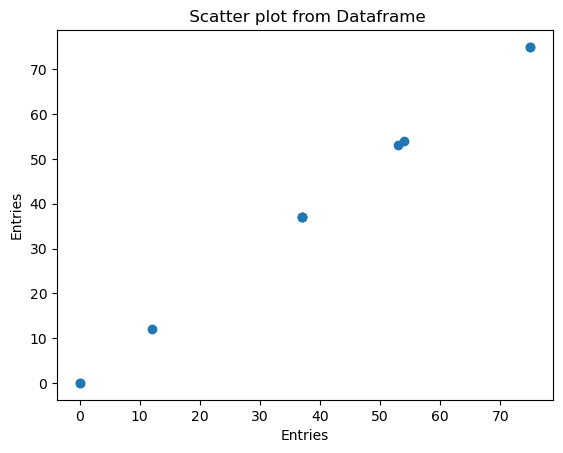

In [103]:
plt.scatter(test['number_of_words_comments'], test['number_of_words_comments'])
plt.xlabel('Entries')
plt.ylabel('Entries')
plt.title(' Scatter plot from Dataframe')

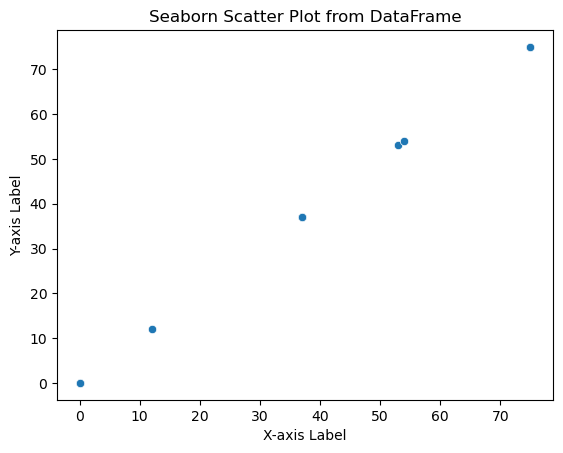

In [104]:
import seaborn as sns


# Scatter plot
sns.scatterplot(x= test['number_of_words_comments'], y = test['number_of_words_comments'], data=test)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Seaborn Scatter Plot from DataFrame')
plt.show()

### Correlations

In [113]:
type(test["id_experiment"][0])

str

In [110]:
string_list = list(map(str, test["id_experiment"]))
print(string_list)

['19235', '17264', '2842', '3492', '3492', '3638', '3647', '3648', '10060', '3647']


In [126]:
test["login"]

0      hnimmo
1            
2            
3            
4            
5            
6            
7            
8     buchler
9            
10       None
Name: login, dtype: object

In [125]:

test["hasDataFiles"]

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
Name: hasDataFiles, dtype: bool

In [111]:
test["id_experiment"] = string_list

In [112]:
test

name  \
0  Role of PRR7 in control of the CCA1 promoter   
1                                      CCA1:LUC   
2                   TiMet WP1.1 qRT-PCR elf3 LD   
3                      Q-PCR LD (12:12) 17C LHY   
4                      Q-PCR LD (12:12) 17C LHY   
5                  cca1 lhy Long #1 CCA1 marker   
6                  cca1 lhy Long #1 CAB2 marker   
7                  cca1 lhy Long #1 CCR2 marker   
8                                     test test   
9                  cca1 lhy Long #1 CAB2 marker   

                                             purpose  \
0  To test whether PRR7 is required for circadian...   
1  Analysis CCA1:LUC period and amplitude changes...   
2  TiMet focuses on an important and general biol...   
3  Experiment to reparameterize the clock model w...   
4  Experiment to reparameterize the clock model w...   
5  Test for period changes during seedlling growt...   
6  Test for period changes during seedlling growt...   
7  Test for period changes during seedlling growt...   
8  test test test test test test test test test t...   
9  Test for period changes during seedlling growt...   

                                         description  \
0  In previous experiments several clock mutation...   
1                                                      
2  WT and elf3-4 mutants, in biological duplicate...   
3  Literature data from: 'Temp'\n\t    by: Aurora...   
4  Literature data from: 'Temp'\n\t    by: Aurora...   
5  If periods change during development, then our...   
6  If periods change during development, then our...   
7  If periods change during development, then our...   
8                                               test   
9  If periods change during development, then our...   

                                            comments      id    login  \
0  Details are as in Bordage et al (2016) New Phy...  2627.0   hnimmo   
1                                                                       
2  The elf3 mutant was harvested at 13 day not at...                    
3  24h sample lost for several genotypes. \nCurat...                    
4  24h sample lost for several genotypes. \nCurat...                    
5  Data collection by Victoria Hibberd ca. Septem...                    
6  Data collection by Victoria Hibberd ca. Septem...                    
7  Data collection by Victoria Hibberd ca. Septem...                    
8                                                     1022.0  buchler   
9  Data collection by Victoria Hibberd ca. Septem...                    

   firstName         lastName ORCID  \
0       Hugh            Nimmo         
1      Flash            Light         
2     Tomasz        Zielinski         
3     Aurora  Pinas-Fernandez         
4     Aurora  Pinas-Fernandez         
5  Andrew J.           Millar         
6     Andrew           Millar         
7     Andrew           Millar         
8    Nicolas          Buchler         
9     Andrew           Millar         

                                institution_name  ...          dataCategory  \
0                          University of Glasgow  ...         EXPR_REPORTER   
1                        University of Edinburgh  ...         EXPR_REPORTER   
2              MPI of Molecular Plant Physiology  ...            TRANSCRIPT   
3                        University of Edinburgh  ...            TRANSCRIPT   
4                        University of Edinburgh  ...            TRANSCRIPT   
5                        University of Edinburgh  ...         EXPR_REPORTER   
6  University of Warwick University of Edinburgh  ...         EXPR_REPORTER   
7                        University of Edinburgh  ...         EXPR_REPORTER   
8                                Duke University  ...  DELAYED_FLUORESCENCE   
9  University of Warwick University of Edinburgh  ...         EXPR_REPORTER   

  id_experiment number_of_words_name charac_on_name number_of_words_purpose  \
0         19235                    9             44             

In [114]:
from ydata_profiling import ProfileReport
profile = ProfileReport(test)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [116]:
missing_values_table(test)

Missing Values  % of Total Values
name                                                0                0.0
purpose                                             0                0.0
description                                         0                0.0
comments                                            0                0.0
id                                                  0                0.0
login                                               0                0.0
firstName                                           0                0.0
lastName                                            0                0.0
ORCID                                               0                0.0
institution_name                                    0                0.0
logName                                             0                0.0
grantNr                                             0                0.0
institution.name                                    0                0.0
executionDate                                       0                0.0
measurementDesc.technique                           0                0.0
measurementDesc.equipment                           0                0.0
measurementDesc.description                         0                0.0
measurementDesc.parameters                          0                0.0
growthEnvironments.environments                     0                0.0
experimentalEnvironments.environments               0                0.0
hasAttachments                                      0                0.0
hasTSData                                           0                0.0
hasPPAJobs                                          0                0.0
hasDataFiles                                        0                0.0
attachmentsSize                                     0                0.0
biodare1Id                                          0                0.0
isOpenAccess                                        0                0.0
licence                                             0                0.0
hasRhythmicityJobs                                  0                0.0
bios                                                0                0.0
dataCategories                                      0                0.0
labels                                              0                0.0
species                                             0                0.0
ecotypes                                            0                0.0
genotypes                                           0                0.0
markers                                             0                0.0
lines                                               0                0.0
growthStages                                        0                0.0
tagTypes                                            0                0.0
materialTypes                                       0                0.0
materialOrigins                                     0                0.0
customTags                                          0                0.0
externalIds                                         0                0.0
created                                             0                0.0
createdBy                                           0                0.0
modified                                            0                0.0
modifiedBy                                          0                0.0
dataCategory                                        0                0.0
id_experiment                                       0                0.0
number_of_words_name                                0                0.0
charac_on_name                                      0                0.0
number_of_words_purpose                             0                0.0
charac_on_purpose                                   0                0.0
number_of_words_description                         0                0.0
chrac_on_description    